# Predicting heart disease

This notebooks uses python and different data science libraries to build a machine learning classification model capable of predicting if a patient has a heart disease, based on their medical attributes.

## 1. Problem Definition

Given medical attributes about a patient, is it possible to predict the pressence or absence of a heart disease?

## 2. Data

The original data can be found in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease). For this project, the dataset was taken in csv format from [kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).

## 3. Evaluation

Given the nature of the prediction this model is going to make. A 95% accuracy is required in this proof of concept to be considered viable for further use.

## 4. Features

**Medical attributes (14):**

- **age:** age in years
- **sex:**: 0 = female, 1 = male
- **cp:** chest pain type
    - 0: Typical angina (chest pain related decreased blood supply to heart).
    - 1: Atypical angina (chest pain not related to heart).
    - 2: Non anginal pain (typically esophageal spasms - non heart related).
    - 3: Asymptomatic (chest pain not showing signs of disease).
- **trestbps:** resting blood pressure (in mmHg on admission to the hospital)
- **chol:** serum cholestoral in mg/dl
- **fbs:** fasting blood sugar > 120 mg/dl (0 = false, 1 = true)
- **restecg:** resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormally
    - 2: Possible or definite left ventricular hypertrophy
- **thalach:** maximum heart rate achieved
- **exang:** exercise induced angina (0 = no, 1 = yes)
- **oldpeak** = ST depression induced by exercise relative to rest
- **slope:** the slope of the peak exercise ST segment
    - 0: Upsloping: better heart rate with excercise.
    - 1: Flatsloping: minimal change (typical healthy heart)
    - 2: Downslopins: signs of unhealthy heart
- **ca:** number of major vessels (0-3) colored by flourosopy
- **thal:** thalium stress result
    - 1, 3: normal
    - 6: fixed defect
    - 7: reversable defect: no proper blood movement when excercising
- **target:** have disease (1) or not (0). Predicted attribute.

## Tools to use

For data analytics and manipulation, we're going to use NumPy, pandas and Matplotlip; and for modeling, scikit-learn.

In [28]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To output charts inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('heart_disease.csv')
df.shape

(303, 14)

## Exploratory data analysis

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# How many had heart disease and not.
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

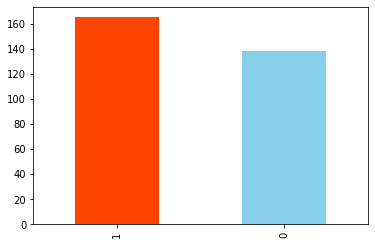

In [6]:
df['target'].value_counts().plot(kind='bar',
                                 color=['orangered', 'skyblue']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare sex vs target column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


72 out of 96 women have heart disease. Almost a 75% for this data.

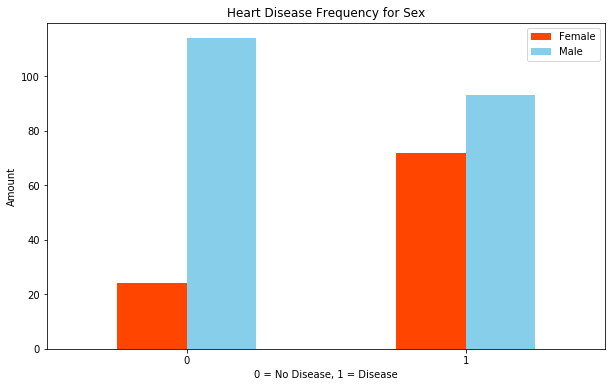

In [12]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          figsize=(10,6),
                                          color=['orangered', 'skyblue']);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max. Heart Reate for Heart Disease

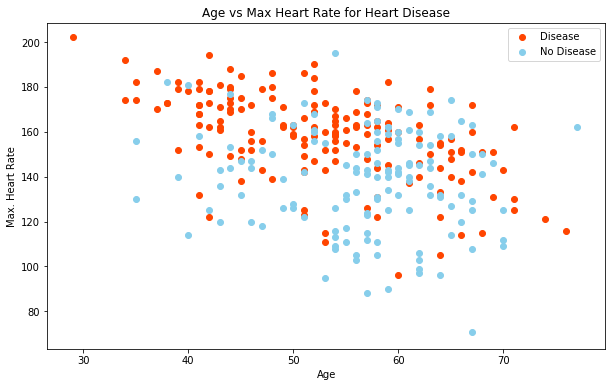

In [13]:
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='orangered')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='skyblue')

plt.title("Age vs Max Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease", "No Disease"]);

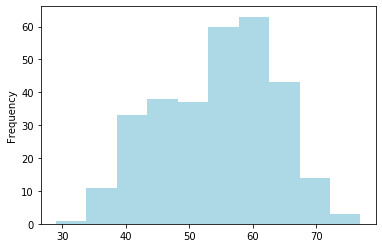

In [61]:
# Check the distribution of the age column
df['age'].plot(kind='hist',
               color='lightblue');

### Heart Disease Frequency per Chest Pain Type

- 0: Typical angina (chest pain related decreased blood supply to heart).
- 1: Atypical angina (chest pain not related to heart).
- 2: Non anginal pain (typically esophageal spasms - non heart related).
- 3: Asymptomatic (chest pain not showing signs of disease).

In [15]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Surprinsingly, non aginal pain –which is supposed to not be related to heart problems– is significally more present on patients that do have heart disease than those who not (69 vs 18).

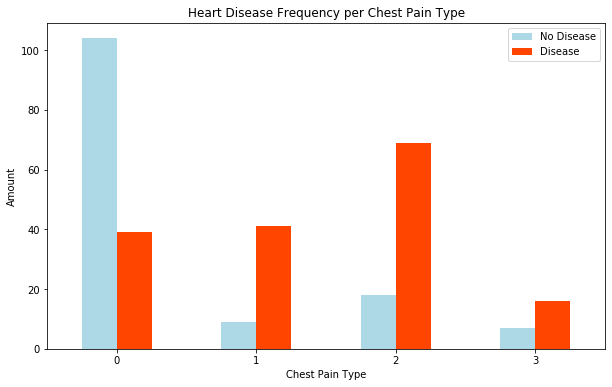

In [16]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar',
                                         figsize=(10,6),
                                         color=['lightblue', 'orangered'])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

### Make a correlation matrix

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


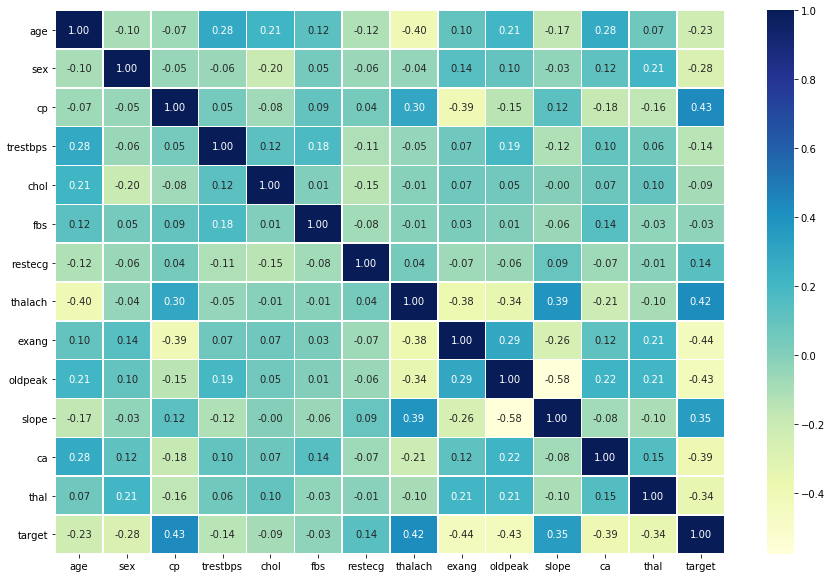

In [18]:
# Plot the correlation matrix
c_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(c_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu');

cp, thalach and slope have the strongest positive correlation with target. exang, oldpeak and ca the strongest negative corr.

## 5. Modeling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split data into X (independent) & y (dependent)
X = df.drop('target', axis=1)
y = df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [49]:
# Split into training and test
np.random.seed(919)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Since we have 303 rows, it's reasonable to use the standard 80-20% split.

In [50]:
X_train.shape, y_train.shape

((242, 13), (242,))

In [51]:
X_test.shape, y_test.shape

((61, 13), (61,))

What model should we use? We'll use scikit-learn machine learning map as a guide:

[![Scikit-learn ml map](https://scikit-learn.org/stable/_static/ml_map.png)](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

Since we're trying to predict a category, have labeled data and <100k samples, we'll start with a **Linear Support Vector Classifier**, then go for **KNeighbors classifier** and **RandomForest** (Ensemble Classification). We're also gonna try **Logistic Regression**, which doesn't appear in the map. We'll create a function to fit and score all of this models to the data.

In [52]:
# Put models in a dictionary
models = {'LinearSVC': LinearSVC(),
          'KNeighbors': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Logistic Regression': LogisticRegression()}

# We'll create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate a ml model, given its type, and train and test data.
    
    Parameters:
        models: a dict of different Sklearn machine learning models
        X_train: training data (independent variables)
        X_test: testing data (independent variables)
        y_train: training labels (dependent variable)
        y_test: testing labels (dependent variable)
    """
    
    # Set random seed
    np.random.seed(919)
    
    # Make a dict to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)
        # Evaluate the model and add to model scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [53]:
# Run the function
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/Users/jorgepasco/Development/projects/ml-heart-disease-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jorgepasco/Development/projects/ml-heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.7049180327868853,
 'KNeighbors': 0.639344262295082,
 'Random Forest': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442}

### Model comparison

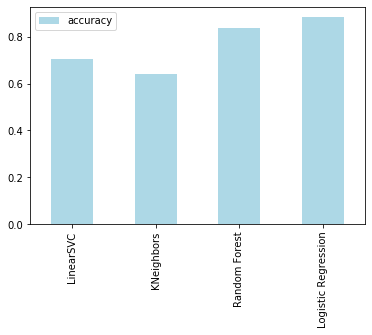

In [62]:
model_comparison = pd.DataFrame(model_scores, index=['accuracy'])
model_comparison.T.plot(kind='bar', color='lightblue');

Without tuning, the best models are, in order:

1. Logistic Regression
2. Random Forest
3. LinearSVC
4. KNeighbors

### Hyperparameter tuning

In [74]:
# Tuning KNeighbors
# Let's create empty list to save the new train and test scores
train_scores = []
test_scores = []

# Try tuning n_neighbors hyperparameter
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through neightbors list
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update training and test score lists
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [75]:
train_scores

[1.0,
 0.8016528925619835,
 0.7851239669421488,
 0.7768595041322314,
 0.7727272727272727,
 0.7644628099173554,
 0.7396694214876033,
 0.743801652892562,
 0.7355371900826446,
 0.7272727272727273,
 0.7396694214876033,
 0.731404958677686,
 0.7148760330578512,
 0.7231404958677686,
 0.7148760330578512,
 0.6983471074380165,
 0.7024793388429752,
 0.7066115702479339,
 0.7024793388429752,
 0.6818181818181818]

In [76]:
test_scores

[0.5737704918032787,
 0.5901639344262295,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6721311475409836,
 0.639344262295082,
 0.6229508196721312,
 0.5901639344262295,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312,
 0.6065573770491803,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312]

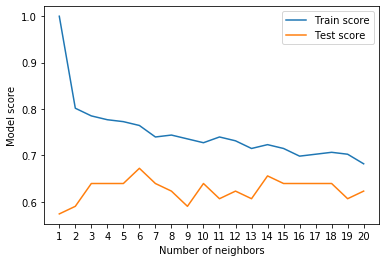

In [79]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1, 21, 1))
plt.legend();

In [87]:
max_score = max(test_scores)
improvement = (max_score - model_scores['KNeighbors'])
print(f"The max KNN score on the test data is {max_score * 100:.2f}%")
print(f"It improved by {improvement * 100:.2f}%")

The max KNN score on the test data is 67.21%
It improved by 3.28%
